In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sample_submission = pd.read_csv('./data/sample_submission.csv', index_col=0)
train = pd.read_csv('./data/train.csv', index_col=0)
test = pd.read_csv('./data/test.csv', index_col=0)

In [3]:
sample_submission.head(3)

,STAR_WHITE_DWARF,STAR_CATY_VAR,STAR_BROWN_DWARF,SERENDIPITY_RED,REDDEN_STD,STAR_BHB,GALAXY,SERENDIPITY_DISTANT,QSO,SKY,STAR_RED_DWARF,ROSAT_D,STAR_PN,SERENDIPITY_FIRST,STAR_CARBON,SPECTROPHOTO_STD,STAR_SUB_DWARF,SERENDIPITY_MANUAL,SERENDIPITY_BLUE
id,,,,,,,,,,,,,,,,,,,
199991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train.head(3)

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,
0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,...,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,...,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,...,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928


In [5]:
# type 을 laber encoding하고 type_num 열을 생성함

column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

train['type_num'] = train['type'].apply(lambda x: to_number(x, column_number))

# Type 별 갯수

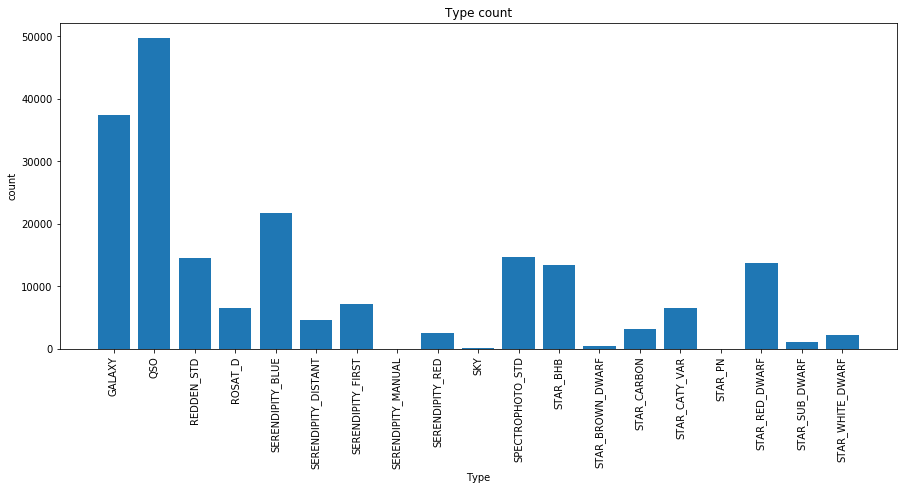

In [6]:
plt.figure(figsize=(15,6))

plt.title('Type count')
plt.ylabel('count')
plt.xlabel('Type')
plt.bar(train.groupby('type')['fiberID'].count().index, train.groupby('type')['fiberID'].count().values)
plt.xticks(rotation=90)
plt.show()

# Fiber id 분석

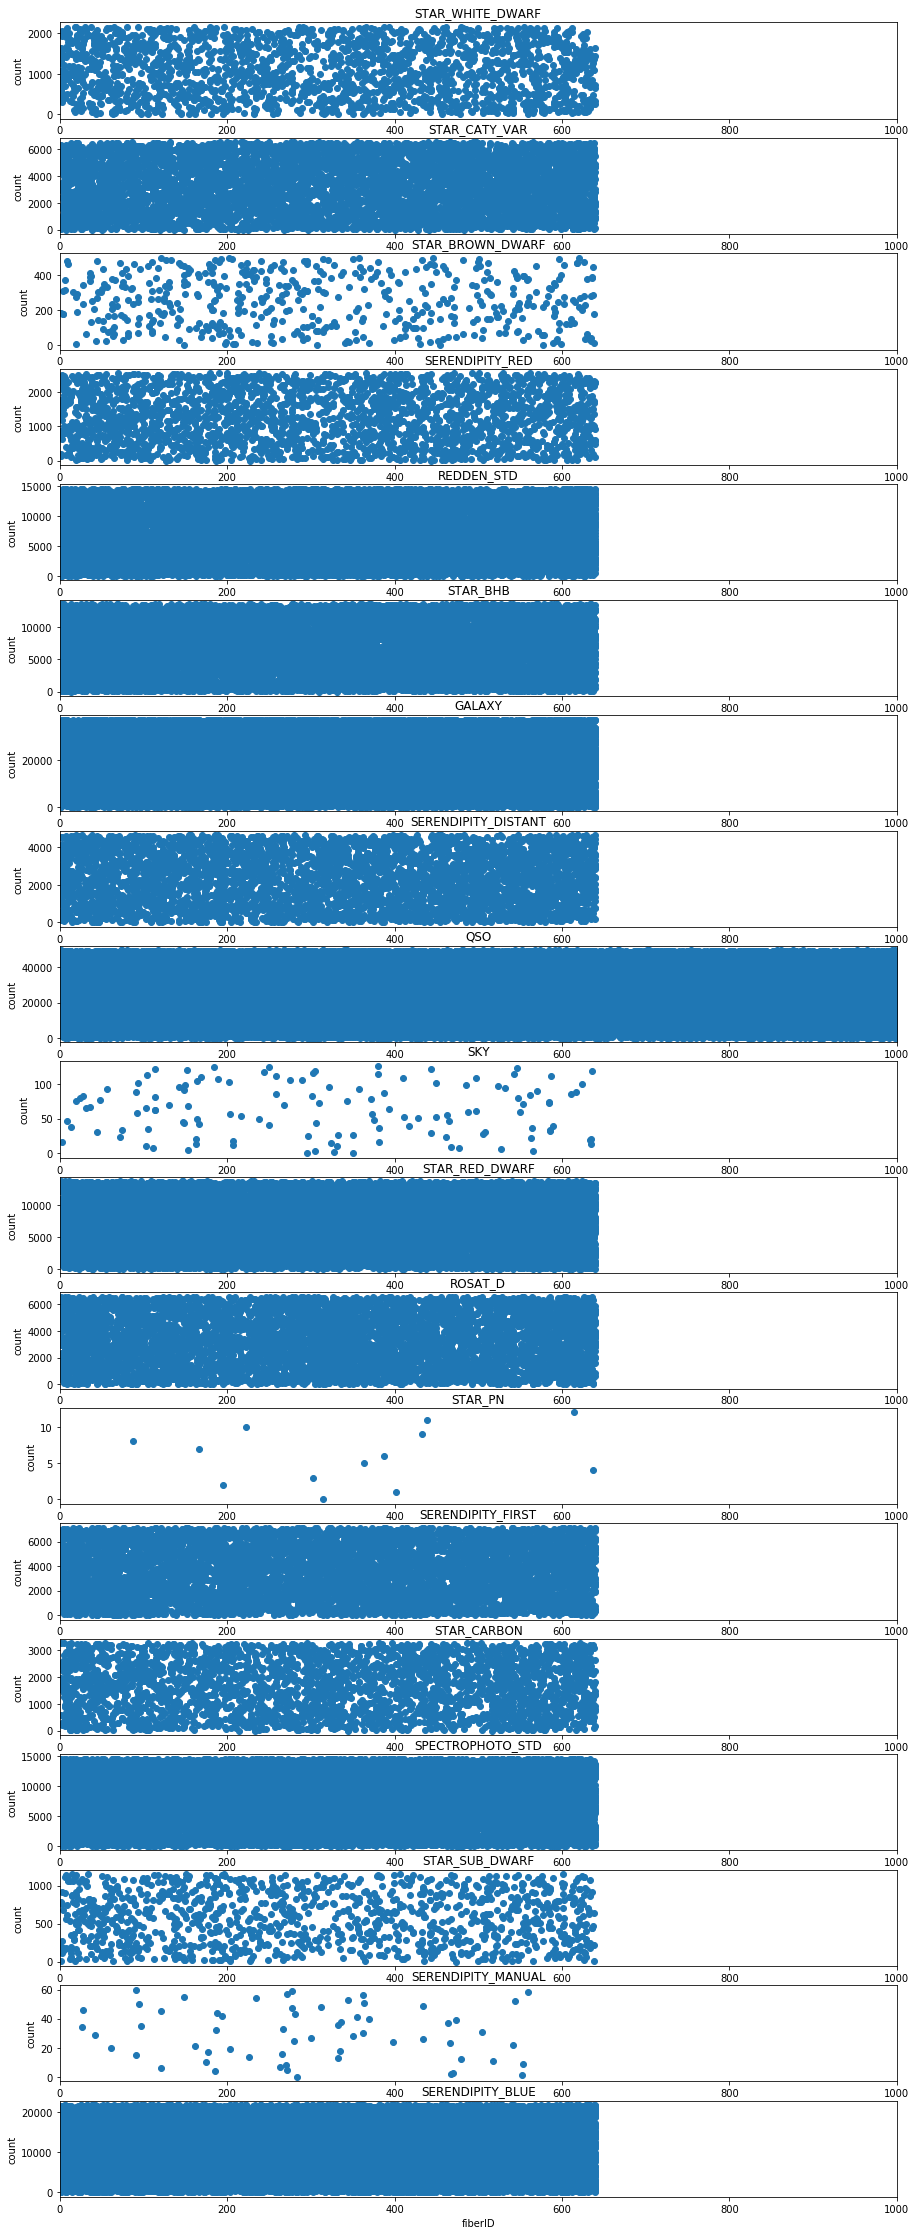

In [7]:
# type, fiberID관의 관계도를 보기위한 시각화

fig , ax = plt.subplots(nrows = len(set(train['type'])), ncols=1, figsize = (15,40))
for i in range(len(set(train['type']))):
    ax[i].scatter(train.loc[train['type_num']==i, 'fiberID'],range(train.loc[train['type_num']==i, 'fiberID'].shape[0]))
    ax[i].set_xlim(0,1000)
    ax[i].set_ylabel('count')
    ax[i].set_xlabel('fiberID')
    ax[i].set_title(list(column_number.keys())[i])

In [8]:
train[ train['fiberID'] == 640 ]['type'].value_counts()

QSO                    88
GALAXY                 48
SERENDIPITY_BLUE       36
REDDEN_STD             33
SPECTROPHOTO_STD       29
STAR_RED_DWARF         29
ROSAT_D                18
SERENDIPITY_FIRST      13
STAR_BHB               12
SERENDIPITY_DISTANT    11
STAR_CATY_VAR          10
STAR_CARBON             6
STAR_WHITE_DWARF        3
SERENDIPITY_RED         3
Name: type, dtype: int64

In [9]:
# fiberID 가 640보다 큰 경우 모두 QSO로 분류됨
train[ train['fiberID'] > 640 ]['type'].value_counts()

QSO    15401
Name: type, dtype: int64

In [10]:
# 데이터의 더 잘 분류하기 위해 640을 초과하는 fiberID는 3000으로 바꾸어줌

train.loc[ train['fiberID'] > 640, 'fiberID' ] = 3000
test.loc[ test['fiberID'] > 640, 'fiberID' ] = 3000

# 각 열에 대한 데이터 분포정도

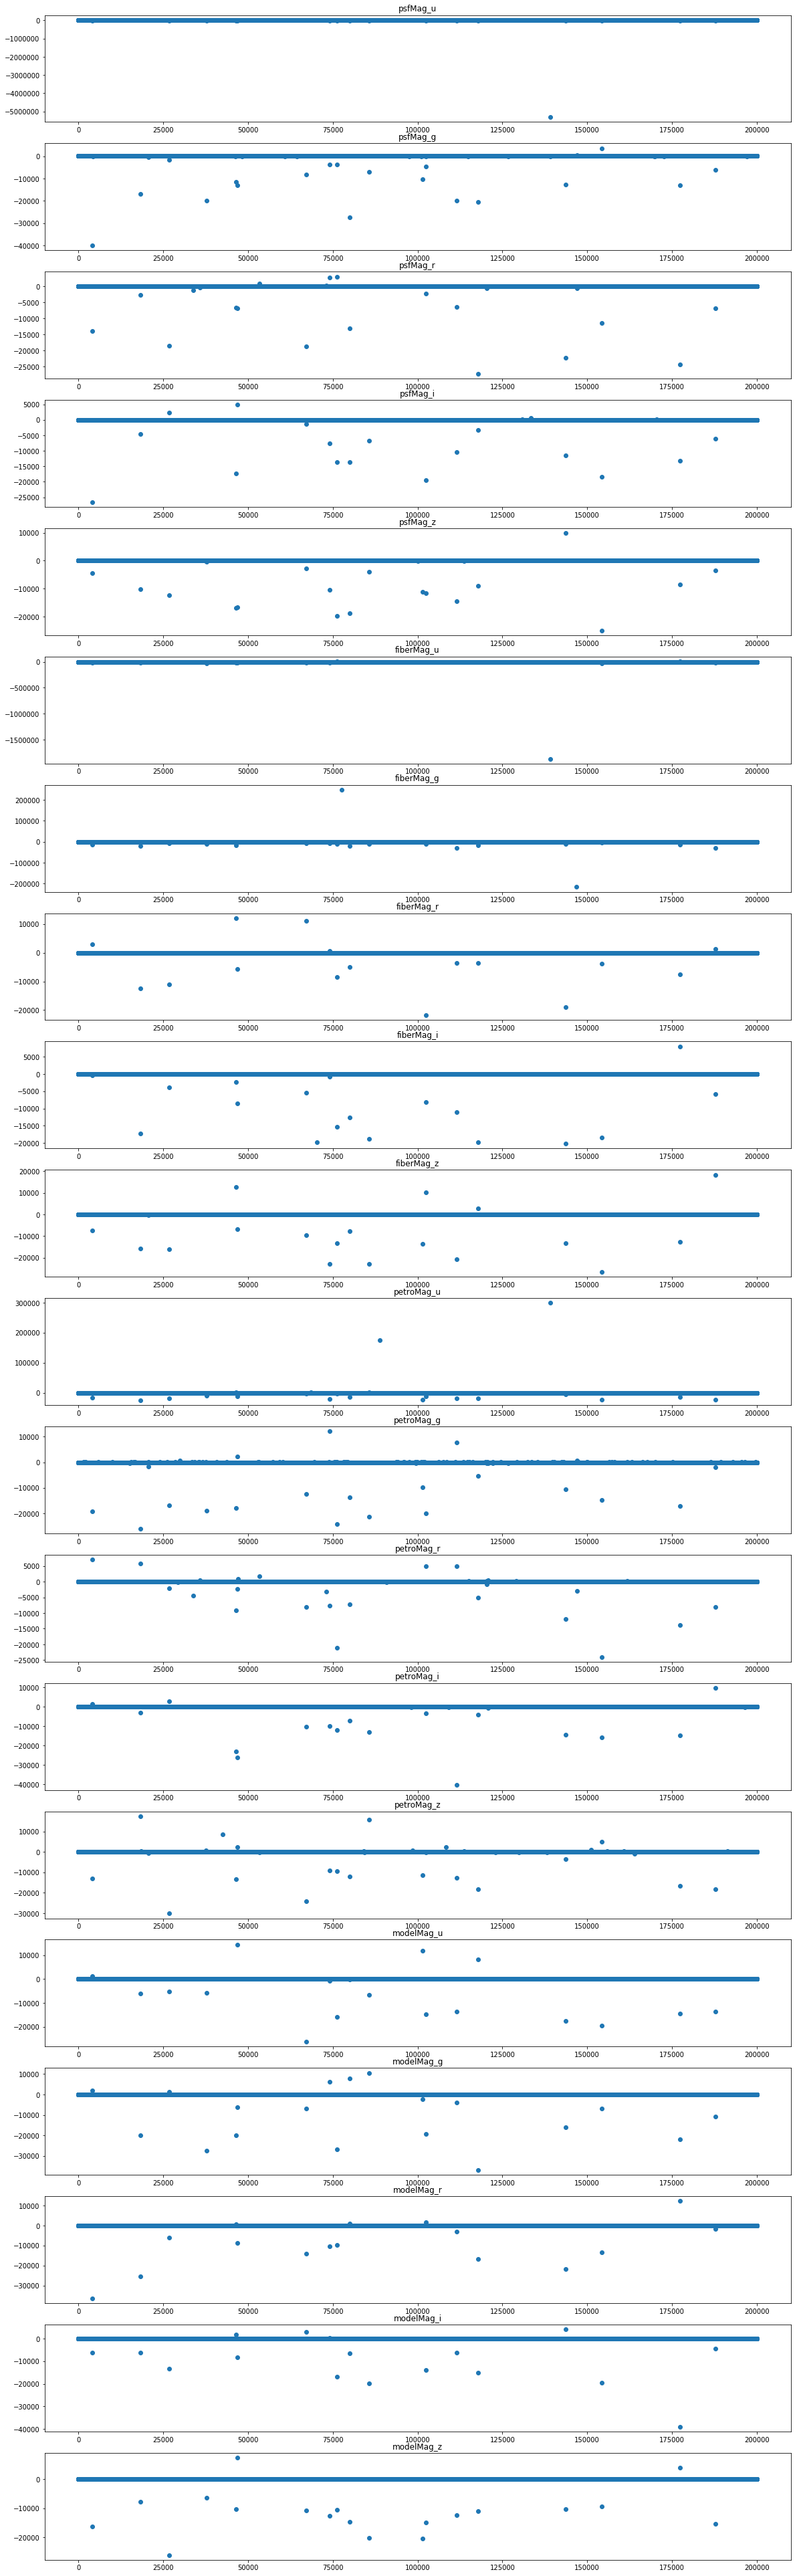

In [11]:
#각 열별로 scatter 그래프를 그림 . 그런데 보통 분포는 다 비슷하게 몰려있는데(평균은 대개 20)
#이상치라고 불리우는 이상한 값들이 너무 많음 

fig, ax = plt.subplots(nrows = 20, ncols= 1 ,figsize = (20,70))

for i in range(20):
    ax[i].scatter(x =  train.index, y = train[train.columns[i+2]].values)
    ax[i].set_title(train.columns[i+2])

plt.show()

#이상치들을 해결해줄 필요가 있음 . 

In [12]:
# 일반적으로 데이터는 20.XXX 근방이지만 이상치라 판단되는 값들을 제거하기위해
# 각 row에서 값들의 절대값이 3개 이상 500을 넘으면 이상치라 판단하고 train_drop 이라는 dataFrame 생성

drop_need_list_index = []

for i in range(train.shape[0]):
    stack = 0
    for j in train.columns[2:22]:
        if(abs(train.loc[i,j]) > 500):
            stack = stack + 1
            if(stack >= 3):
                drop_need_list_index.append(i)
                break

print(drop_need_list_index)

train_drop = train.drop(drop_need_list_index)

[3991, 18277, 26683, 37735, 46441, 46896, 67227, 74089, 76167, 80038, 85676, 101377, 102448, 111582, 117917, 139197, 143592, 147012, 154235, 177300, 187706]


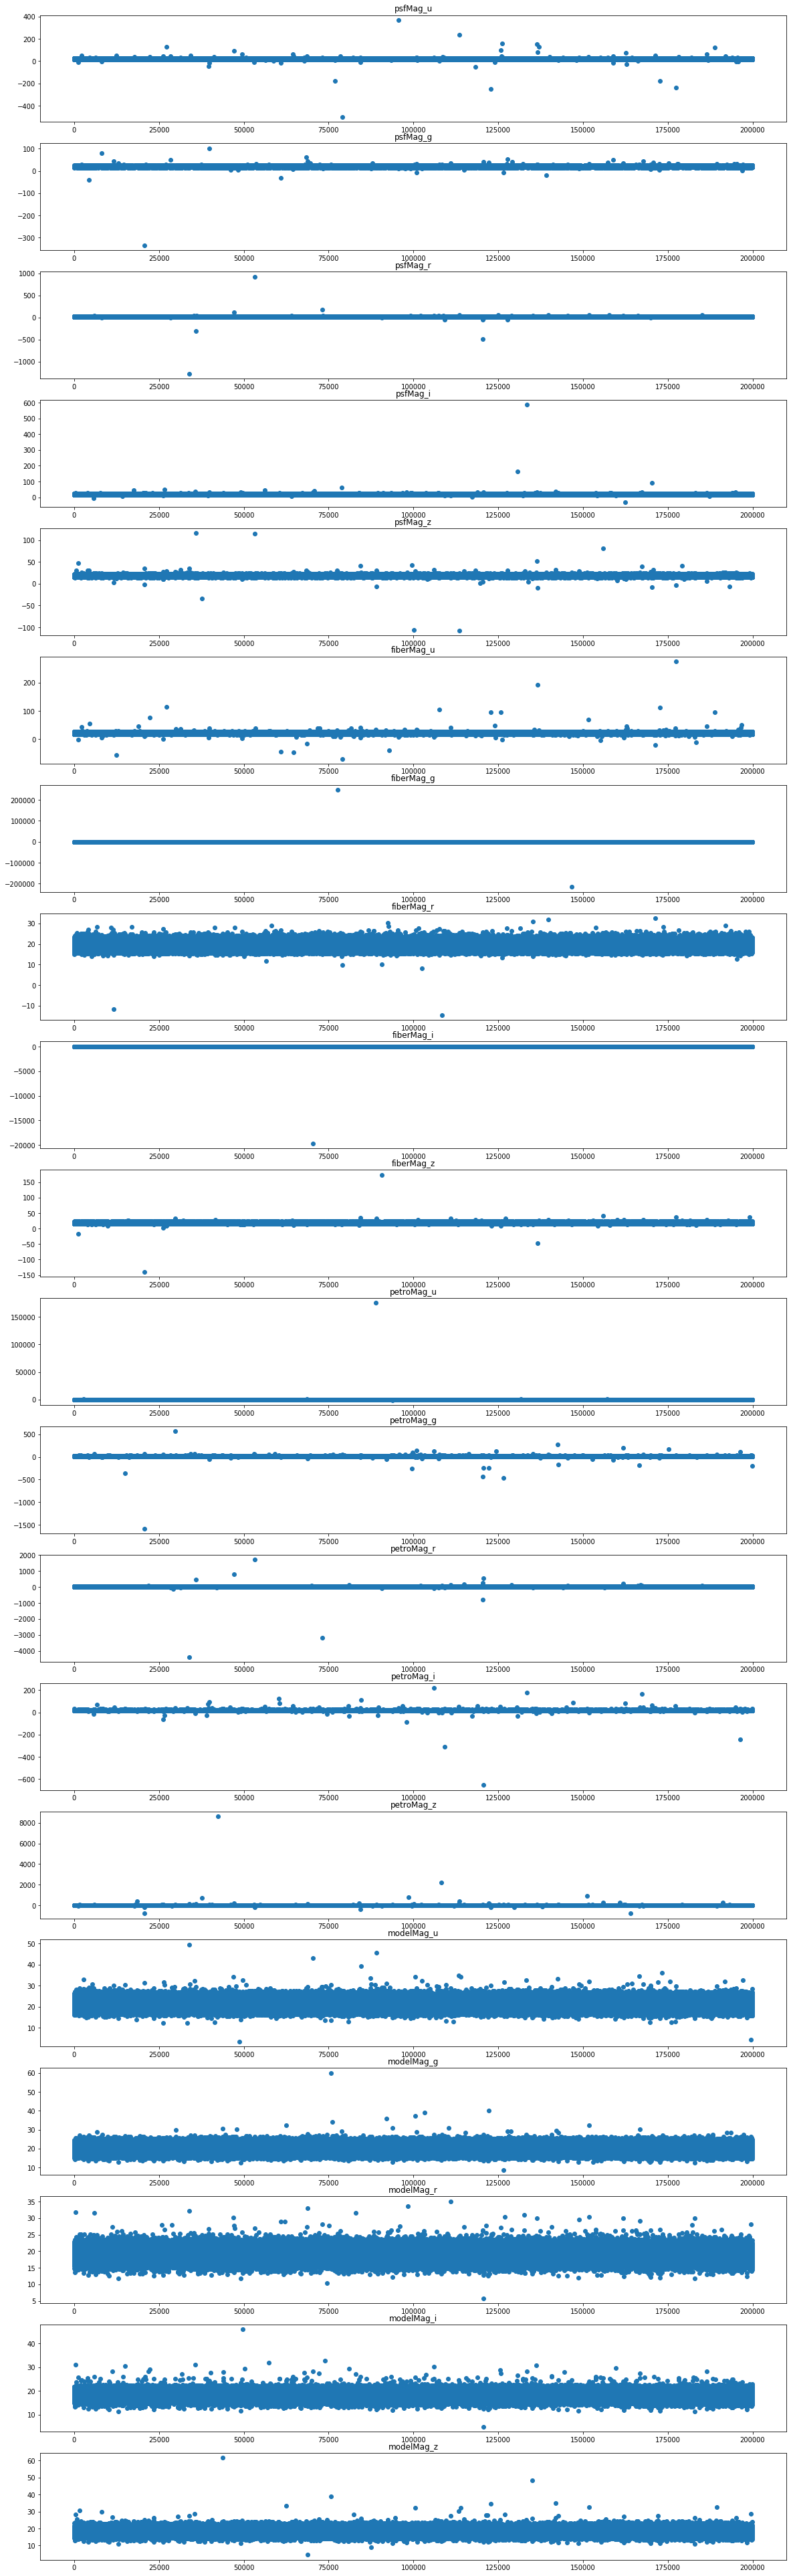

In [13]:
# train_drop에 대한 데이터 분포도를 다시 그림
# 위의 분포도에 비해 극값이 많이 없어진 것을 확인

fig, ax = plt.subplots(nrows = 20, ncols= 1 ,figsize = (20,70))

for i in range(20):
    ax[i].scatter(x =  train_drop.index, y = train_drop[train_drop.columns[i+2]].values)
    ax[i].set_title(train_drop.columns[i+2])

plt.show()

In [14]:
train.describe()

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,...,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,type_num
count,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,...,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000
mean,528.602582,-6.750146e+00,18.675373,18.401235,18.043495,17.663526,1.084986e+01,19.072693,19.134483,18.183331,...,18.454136,18.481525,17.686617,17.699207,20.110991,18.544375,18.181544,17.692395,17.189281,8.877339
std,736.086038,1.187678e+04,155.423024,127.128078,116.622194,123.735298,4.172116e+03,749.256162,90.049058,122.378972,...,154.376277,97.240448,145.730872,142.691880,122.299062,161.728183,133.984475,131.183416,133.685138,4.624156
min,1.000000,-5.310802e+06,-40022.466071,-27184.795793,-26566.310827,-24878.828280,-1.864766e+06,-215882.917191,-21802.656144,-20208.516262,...,-25958.752324,-23948.588523,-40438.184078,-30070.729379,-26236.578659,-36902.402336,-36439.638493,-38969.416822,-26050.710196,0.000000
25%,174.000000,1.965259e+01,18.701180,18.048572,17.747663,17.425523,1.994040e+01,18.902851,18.259352,17.903615,...,18.113933,17.479794,17.050294,16.804705,19.266214,18.076120,17.423425,16.977671,16.705774,6.000000
50%,349.000000,2.087136e+01,19.904235,19.454492,19.043895,18.611799,2.104910e+01,20.069038,19.631419,19.188763,...,19.586559,19.182789,18.693370,18.174592,20.406840,19.547674,19.143156,18.641756,18.100997,8.000000
75%,526.000000,2.216043e+01,21.150297,20.515936,20.073528,19.883760,2.233754e+01,21.385830,20.773911,20.331419,...,21.004397,20.457491,20.019112,19.807652,21.992898,20.962386,20.408140,19.968846,19.819554,11.000000
max,3000.000000,1.877392e+04,3538.984910,3048.110913,4835.218639,9823.740407,4.870154e+03,248077.513380,12084.735440,8059.638535,...,12139.815877,7003.136546,9772.190537,17403.789263,14488.251976,10582.058590,12237.951703,4062.499371,7420.534172,18.000000


In [15]:
train_drop.describe()

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,...,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,type_num
count,199970.000000,199970.000000,199970.000000,199970.000000,199970.000000,199970.000000,199970.000000,199970.000000,199970.000000,199970.000000,...,199970.000000,199970.000000,199970.000000,199970.000000,199970.000000,199970.000000,199970.000000,199970.000000,199970.000000,199970.000000
mean,528.626714,20.984333,19.860947,19.282873,18.877086,18.613212,21.174865,20.250684,19.504891,18.988232,...,19.589088,18.986944,18.603464,18.458980,20.732582,19.532131,18.940927,18.521189,18.277716,8.877372
std,736.118979,2.864192,2.060628,4.191556,2.102467,1.777506,2.182424,735.404774,1.708587,44.173830,...,4.942494,13.230832,2.755541,20.553925,2.188650,1.961616,1.862733,1.798867,1.869086,4.624112
min,1.000000,-501.529124,-335.608609,-1276.171892,-30.711890,-106.927107,-68.798881,-215882.917191,-14.662435,-19721.172166,...,-1581.627834,-4370.038636,-654.195115,-789.601838,3.444448,8.686690,5.781584,5.004407,4.460086,0.000000
25%,174.000000,19.652827,18.701795,18.048874,17.748076,17.425901,19.941038,18.903313,18.259497,17.903901,...,18.114156,17.480107,17.050583,16.805060,19.266652,18.076330,17.423652,16.977939,16.705939,6.000000
50%,349.000000,20.871574,19.904298,19.454570,19.044058,18.611948,21.049257,20.069221,19.631663,19.188987,...,19.586777,19.182970,18.693574,18.174813,20.406962,19.547746,19.143306,18.641853,18.101175,8.000000
75%,526.000000,22.160468,21.150432,20.515959,20.073544,19.883922,22.337685,21.385959,20.773876,20.331471,...,21.004399,20.457506,20.019129,19.807648,21.992891,20.962241,20.408123,19.968850,19.819568,11.000000
max,3000.000000,368.939515,102.124043,923.580805,585.370349,115.830481,274.083693,248077.513380,32.574603,42.002047,...,566.468016,1705.906184,219.701423,8647.360709,49.487277,59.987842,35.102312,45.783550,61.597879,18.000000


# train data split을 통해 방법론들 점수 계산

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost
import lightgbm
import sklearn.metrics
import joblib

In [17]:
X = train_drop.drop(['type_num','type'],axis = 1)
y = train_drop['type_num'].values

In [18]:
# 데이터 생성
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
rf_clf = RandomForestClassifier(random_state=5, n_estimators=100)
rf_clf.fit( X_train, y_train )
pred = rf_clf.predict( X_test )

print( 'RandomForest : ' +  str(rf_clf.score(X_test, y_test) ) )

RandomForest : 0.875831374706206


In [20]:
xg_model = xgboost.XGBClassifier()
xg_model.fit( X_train, y_train )
pred = xg_model.predict( X_test )

print( 'xgboost : ' +  str( xg_model.score(X_test, y_test) ) )

xgboost : 0.8412095147605474


In [21]:
lg_model = lightgbm.LGBMClassifier()
lg_model.fit( X_train, y_train )
pred = lg_model.predict( X_test )

print( 'lightgbm : ' +  str( lg_model.score(X_test, y_test) ) )

lightgbm : 0.7748662299344902


# submission 생성

In [22]:
# 데이터 셋 생성

train_x = train_drop.drop(columns=['type', 'type_num'], axis=1)
train_y = train_drop['type_num']
test_x = test

## 1. RandomForest

In [23]:
# randomForest 모델 생성, 학습
rf_model = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf_model.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [24]:
# predict_proba 를 통해 각 컬럼의 예측률응 판단
rf_y_pred = rf_model.predict_proba(test_x)

In [25]:
# submission 생성후, 저장
rf_submission = pd.DataFrame(data=rf_y_pred, columns=sample_submission.columns, index=sample_submission.index)
rf_submission.to_csv('./submission/ramdomForest.csv', index=True)

In [26]:
# 학습 모델을 model 폴더에 저장
joblib.dump(rf_model, './model/ramdomForest.joblib')

['./model/ramdomForest.joblib']

## 2. lightgbm

In [27]:
# lightgbm 모델 생성, 학습
lg_model = lightgbm.LGBMClassifier(n_estimators=1250, num_leaves=128,learning_rate=0.009)

evals=[(train_x, train_y)]

# 100회 이상 반복되면 학습중단, 평가기준은 dacon과 같은 logloss로 진행함
lg_model.fit(train_x, train_y, eval_set=evals,  early_stopping_rounds=100, eval_metric='logloss')

[1]	training's multi_logloss: 2.25031
Training until validation scores don't improve for 100 rounds
[2]	training's multi_logloss: 2.20764
[3]	training's multi_logloss: 2.1688
[4]	training's multi_logloss: 2.13271
[5]	training's multi_logloss: 2.09881
[6]	training's multi_logloss: 2.06675
[7]	training's multi_logloss: 2.03623
[8]	training's multi_logloss: 2.00709
[9]	training's multi_logloss: 1.97919
[10]	training's multi_logloss: 1.95234
[11]	training's multi_logloss: 1.92652
[12]	training's multi_logloss: 1.90162
[13]	training's multi_logloss: 1.87757
[14]	training's multi_logloss: 1.85431
[15]	training's multi_logloss: 1.8318
[16]	training's multi_logloss: 1.80998
[17]	training's multi_logloss: 1.78882
[18]	training's multi_logloss: 1.76826
[19]	training's multi_logloss: 1.74828
[20]	training's multi_logloss: 1.72882
[21]	training's multi_logloss: 1.70988
[22]	training's multi_logloss: 1.69139
[23]	training's multi_logloss: 1.67338
[24]	training's multi_logloss: 1.65578
[25]	training

[205]	training's multi_logloss: 0.543105
[206]	training's multi_logloss: 0.540992
[207]	training's multi_logloss: 0.538896
[208]	training's multi_logloss: 0.536817
[209]	training's multi_logloss: 0.534758
[210]	training's multi_logloss: 0.532718
[211]	training's multi_logloss: 0.530694
[212]	training's multi_logloss: 0.528694
[213]	training's multi_logloss: 0.526711
[214]	training's multi_logloss: 0.524743
[215]	training's multi_logloss: 0.522794
[216]	training's multi_logloss: 0.520855
[217]	training's multi_logloss: 0.518933
[218]	training's multi_logloss: 0.517025
[219]	training's multi_logloss: 0.515132
[220]	training's multi_logloss: 0.513258
[221]	training's multi_logloss: 0.511406
[222]	training's multi_logloss: 0.509556
[223]	training's multi_logloss: 0.507722
[224]	training's multi_logloss: 0.505905
[225]	training's multi_logloss: 0.504106
[226]	training's multi_logloss: 0.50232
[227]	training's multi_logloss: 0.500548
[228]	training's multi_logloss: 0.498789
[229]	training's 

[406]	training's multi_logloss: 0.323009
[407]	training's multi_logloss: 0.322474
[408]	training's multi_logloss: 0.321944
[409]	training's multi_logloss: 0.321414
[410]	training's multi_logloss: 0.320887
[411]	training's multi_logloss: 0.320371
[412]	training's multi_logloss: 0.319848
[413]	training's multi_logloss: 0.319329
[414]	training's multi_logloss: 0.318815
[415]	training's multi_logloss: 0.318304
[416]	training's multi_logloss: 0.317797
[417]	training's multi_logloss: 0.317296
[418]	training's multi_logloss: 0.316793
[419]	training's multi_logloss: 0.316294
[420]	training's multi_logloss: 0.315801
[421]	training's multi_logloss: 0.31531
[422]	training's multi_logloss: 0.314822
[423]	training's multi_logloss: 0.314331
[424]	training's multi_logloss: 0.313844
[425]	training's multi_logloss: 0.313359
[426]	training's multi_logloss: 0.312874
[427]	training's multi_logloss: 0.312394
[428]	training's multi_logloss: 0.31191
[429]	training's multi_logloss: 0.311438
[430]	training's m

[607]	training's multi_logloss: 0.252827
[608]	training's multi_logloss: 0.252605
[609]	training's multi_logloss: 0.252374
[610]	training's multi_logloss: 0.252146
[611]	training's multi_logloss: 0.251919
[612]	training's multi_logloss: 0.251688
[613]	training's multi_logloss: 0.251465
[614]	training's multi_logloss: 0.251238
[615]	training's multi_logloss: 0.251014
[616]	training's multi_logloss: 0.250789
[617]	training's multi_logloss: 0.250563
[618]	training's multi_logloss: 0.250343
[619]	training's multi_logloss: 0.250126
[620]	training's multi_logloss: 0.2499
[621]	training's multi_logloss: 0.249678
[622]	training's multi_logloss: 0.249453
[623]	training's multi_logloss: 0.249239
[624]	training's multi_logloss: 0.249024
[625]	training's multi_logloss: 0.248809
[626]	training's multi_logloss: 0.248592
[627]	training's multi_logloss: 0.248373
[628]	training's multi_logloss: 0.248158
[629]	training's multi_logloss: 0.247943
[630]	training's multi_logloss: 0.247731
[631]	training's m

[807]	training's multi_logloss: 0.217355
[808]	training's multi_logloss: 0.217217
[809]	training's multi_logloss: 0.21708
[810]	training's multi_logloss: 0.216936
[811]	training's multi_logloss: 0.216806
[812]	training's multi_logloss: 0.216668
[813]	training's multi_logloss: 0.216528
[814]	training's multi_logloss: 0.216397
[815]	training's multi_logloss: 0.216254
[816]	training's multi_logloss: 0.216117
[817]	training's multi_logloss: 0.215977
[818]	training's multi_logloss: 0.21584
[819]	training's multi_logloss: 0.215703
[820]	training's multi_logloss: 0.21557
[821]	training's multi_logloss: 0.215432
[822]	training's multi_logloss: 0.215304
[823]	training's multi_logloss: 0.21517
[824]	training's multi_logloss: 0.215032
[825]	training's multi_logloss: 0.214903
[826]	training's multi_logloss: 0.214763
[827]	training's multi_logloss: 0.214627
[828]	training's multi_logloss: 0.214492
[829]	training's multi_logloss: 0.214365
[830]	training's multi_logloss: 0.214225
[831]	training's mul

[1007]	training's multi_logloss: 0.193836
[1008]	training's multi_logloss: 0.193743
[1009]	training's multi_logloss: 0.193646
[1010]	training's multi_logloss: 0.19355
[1011]	training's multi_logloss: 0.193457
[1012]	training's multi_logloss: 0.193363
[1013]	training's multi_logloss: 0.193268
[1014]	training's multi_logloss: 0.193171
[1015]	training's multi_logloss: 0.193078
[1016]	training's multi_logloss: 0.192977
[1017]	training's multi_logloss: 0.192888
[1018]	training's multi_logloss: 0.192794
[1019]	training's multi_logloss: 0.1927
[1020]	training's multi_logloss: 0.1926
[1021]	training's multi_logloss: 0.192508
[1022]	training's multi_logloss: 0.192408
[1023]	training's multi_logloss: 0.19231
[1024]	training's multi_logloss: 0.192209
[1025]	training's multi_logloss: 0.19212
[1026]	training's multi_logloss: 0.192029
[1027]	training's multi_logloss: 0.191928
[1028]	training's multi_logloss: 0.19183
[1029]	training's multi_logloss: 0.191733
[1030]	training's multi_logloss: 0.191634


[1202]	training's multi_logloss: 0.176186
[1203]	training's multi_logloss: 0.176109
[1204]	training's multi_logloss: 0.176029
[1205]	training's multi_logloss: 0.175944
[1206]	training's multi_logloss: 0.175863
[1207]	training's multi_logloss: 0.175788
[1208]	training's multi_logloss: 0.175705
[1209]	training's multi_logloss: 0.175619
[1210]	training's multi_logloss: 0.175537
[1211]	training's multi_logloss: 0.175465
[1212]	training's multi_logloss: 0.175375
[1213]	training's multi_logloss: 0.175288
[1214]	training's multi_logloss: 0.175204
[1215]	training's multi_logloss: 0.17512
[1216]	training's multi_logloss: 0.175031
[1217]	training's multi_logloss: 0.174949
[1218]	training's multi_logloss: 0.174866
[1219]	training's multi_logloss: 0.174773
[1220]	training's multi_logloss: 0.174682
[1221]	training's multi_logloss: 0.174604
[1222]	training's multi_logloss: 0.174514
[1223]	training's multi_logloss: 0.174431
[1224]	training's multi_logloss: 0.174349
[1225]	training's multi_logloss: 0.

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.009, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1250, n_jobs=-1, num_leaves=128, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [28]:
# predict_proba 를 통해 각 컬럼의 예측률응 판단
lg_y_pred = lg_model.predict_proba(test_x)

In [29]:
# submission 생성후, 저장
lg_submission = pd.DataFrame(data=lg_y_pred, columns=sample_submission.columns, index=sample_submission.index)
lg_submission.to_csv('./submission/lightgbm.csv', index=True)

In [30]:
# 학습 모델을 model 폴더에 저장
joblib.dump(lg_model, './model/lightgbm.joblib')

['./model/lightgbm.joblib']

## 3. xgboost & GridSearchCV

In [31]:
# XGBoost.XGBClassifier()로 빈 모델을 만듬
model=xgboost.XGBClassifier()

# XGBoost의 원하는 파라미터를 dict형태로 만듬
param_grid={'booster' :['gbtree'],
                 'silent':[True],
                 'max_depth':[3, 8, 13],
                 'min_child_weight':[1, 5, 10],
                 'gamma':[0,1],
                 'nthread':[5],
                 'colsample_bytree':[0.6, 0.8],
                 'colsample_bylevel':[0.6, 0.9],
                 'n_estimators':[100],
                 'objective':['multi:softprob'],
                 'random_state':[2],
            "eval_set" : [[train_x, train_y]],
           "early_stopping_rounds" : [50]}

In [32]:
# StratifiedKFold() 지정 : 검증
# n_splits : 훈련, 검증 세트 수
cv = StratifiedKFold(n_splits=6, random_state=1)

# 평가기준은 dacon과 같은 logloss로 진행함
label = list(range(0,19))
scorer = sklearn.metrics.make_scorer(sklearn.metrics.log_loss, greater_is_better=False, needs_proba=True, labels = label)
# average : None, 'micro', 'macro', 'weighted', 'samples', 'f1', 'accuracy'

In [33]:
# GridSearchCV()안에 위에서 만든 번들을 다 넣어주어 모델을 생성.
gcv=GridSearchCV(model, param_grid=param_grid, cv=cv, scoring= scorer, n_jobs= 5)

# 만들어진 모델로 fit하고, 최적의 파라미터를 찾음
gcv.fit(train_x.values, train_y.values )

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=1, shuffle=False),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objec...
                         'gamma': [0, 1], 'max_depth': [3, 8, 13],
                         'min_child_weight': [1, 5, 10], 'n_estimators': [100],
                         'nthread': [5], 'objective': ['multi:softprob'],
                         'random_state': [2], 'silent': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scori

In [34]:
# 최적의 모델 생성
xg_model=gcv.best_estimator_

# 모델을 통한 예측
xg_y_pred= xg_model.predict_proba( test_x.values )

In [35]:
# submission 생성후, 저장
xg_submission = pd.DataFrame(data=xg_y_pred, columns=sample_submission.columns, index=sample_submission.index)
xg_submission.to_csv('./submission/xg_submission.csv', index=True)

In [36]:
# 학습 모델을 model 폴더에 저장
joblib.dump(gcv.best_estimator_, './model/xgboost.joblib')

['./model/xgboost.joblib']